## Библиотека gensim

Использовать предобученную модель эмбеддингов или обучить свою можно с помощью библиотеки [gensim](https://radimrehurek.com/gensim/models/word2vec.html).

In [1]:
!pip install gensim

In [2]:
import gensim

Загрузим предобученную модель от Google. Модель включает в себя векторы для 3 миллионов слов и обучалась на 100 миллиардах слов из набора данных Google News. Длина вектора равна 300.

Предварительно скачаем файл [GoogleNews-vectors-negative300.bin.gz](https://drive.google.com/file/d/16NbLPCh93VftlT5in9RE4Y5KjwhGo4EJ/view?usp=sharing) и загрузим его на свой гугл-диск. Файл весит 1,5 Гб.

В переменной `PATH` указывается путь к файлу. Для удобства загрузите файл в корневую папку "Мой диск".

In [3]:
from google.colab import drive

drive.mount('/content/drive/')
PATH = "/content/drive/My Drive/"

Mounted at /content/drive/


Для загрузки предобученных векторных представлений используется модуль [KeyedVectors](https://radimrehurek.com/gensim/models/keyedvectors.html)

In [4]:
from gensim.models import KeyedVectors
google_news_model = KeyedVectors.load_word2vec_format(f'{PATH}/GoogleNews-vectors-negative300.bin.gz', binary=True)

Протестируем загруженные векторные представления.

### Подсчет косинусной меры

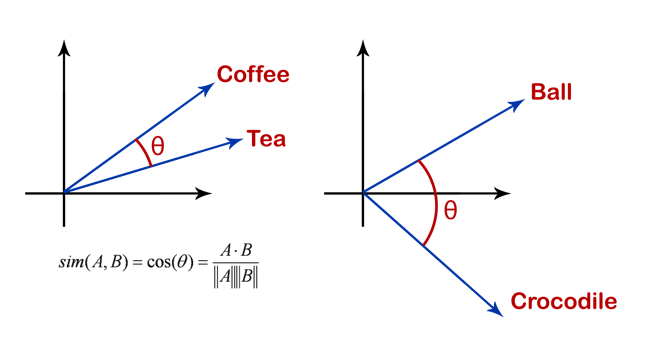

In [5]:
google_news_model.similarity('coffee','tea')

0.5635292

In [6]:
google_news_model['coffee'], google_news_model['coffee'].shape

(array([-1.61132812e-01, -1.36718750e-01, -3.73046875e-01,  6.17187500e-01,
         1.08398438e-01,  2.72216797e-02,  1.00097656e-01, -1.51367188e-01,
        -1.66015625e-02,  3.80859375e-01,  6.54296875e-02, -1.31835938e-01,
         2.53906250e-01,  9.08203125e-02,  2.86865234e-02,  2.53906250e-01,
        -2.05078125e-01,  1.64062500e-01,  2.20703125e-01, -1.74804688e-01,
        -2.01171875e-01,  1.30859375e-01, -3.22265625e-02, -2.41210938e-01,
        -3.19824219e-02,  2.48046875e-01, -2.37304688e-01,  2.89062500e-01,
         1.64794922e-02,  1.29394531e-02,  1.72119141e-02, -3.53515625e-01,
        -1.66992188e-01, -5.90820312e-02, -2.81250000e-01,  9.94873047e-03,
        -1.94091797e-02, -3.22265625e-01,  1.73339844e-02, -5.83496094e-02,
        -2.59765625e-01,  1.42669678e-03,  5.81054688e-02,  1.13769531e-01,
        -8.64257812e-02,  3.54003906e-02, -4.29687500e-01,  2.86865234e-03,
         6.98852539e-03,  1.80664062e-01, -1.79687500e-01,  2.95410156e-02,
        -1.5

In [7]:
import numpy as np
from numpy.linalg import norm

def cos_similarity(model, word1, word2):
  a = model[word1]
  b = model[word2]
  cos_sim = np.dot(a, b)/(norm(a)*norm(b))
  return cos_sim

In [8]:
cos_similarity(google_news_model, 'coffee', 'tea')

0.56352925

📌 Посчитайте косинусную меру для слов "мяч" и "крокодил" двумя способами

In [9]:
# Место для вашего кода
google_news_model.similarity('ball','crocodile')

0.10283584

In [10]:
# Место для вашего кода
cos_similarity(google_news_model, 'ball', 'crocodile')

0.10283584

### Семантически близкие слова

In [11]:
google_news_model.most_similar('cat', topn=20)

[('cats', 0.8099379539489746),
 ('dog', 0.760945737361908),
 ('kitten', 0.7464985251426697),
 ('feline', 0.7326234579086304),
 ('beagle', 0.7150582671165466),
 ('puppy', 0.7075453400611877),
 ('pup', 0.6934291124343872),
 ('pet', 0.6891531348228455),
 ('felines', 0.6755931973457336),
 ('chihuahua', 0.6709762215614319),
 ('pooch', 0.6699832081794739),
 ('kitties', 0.6669641733169556),
 ('dachshund', 0.665578305721283),
 ('poodle', 0.6621246337890625),
 ('stray_cat', 0.6616333723068237),
 ('Shih_Tzu', 0.6573935747146606),
 ('tabby', 0.6555001735687256),
 ('basset_hound', 0.652544379234314),
 ('golden_retriever', 0.6522624492645264),
 ('Siamese_cat', 0.65217125415802)]


📌 Найдите ближайшие понятия для прилагательных "плохой" и "хороший".

In [12]:
# Место для вашего кода
google_news_model.most_similar('bad')

[('good', 0.7190051674842834),
 ('terrible', 0.6828612089157104),
 ('horrible', 0.6702597737312317),
 ('Bad', 0.669891893863678),
 ('lousy', 0.6647640466690063),
 ('crummy', 0.567781925201416),
 ('horrid', 0.5651682615280151),
 ('awful', 0.5527253150939941),
 ('dreadful', 0.5526429414749146),
 ('horrendous', 0.5445998311042786)]

In [13]:
# Место для вашего кода
google_news_model.most_similar('good')

[('great', 0.7291510105133057),
 ('bad', 0.7190051078796387),
 ('terrific', 0.6889115571975708),
 ('decent', 0.6837348341941833),
 ('nice', 0.6836092472076416),
 ('excellent', 0.644292950630188),
 ('fantastic', 0.6407778263092041),
 ('better', 0.6120728850364685),
 ('solid', 0.5806034803390503),
 ('lousy', 0.576420247554779)]

### Семантические пропорции (аналогии)

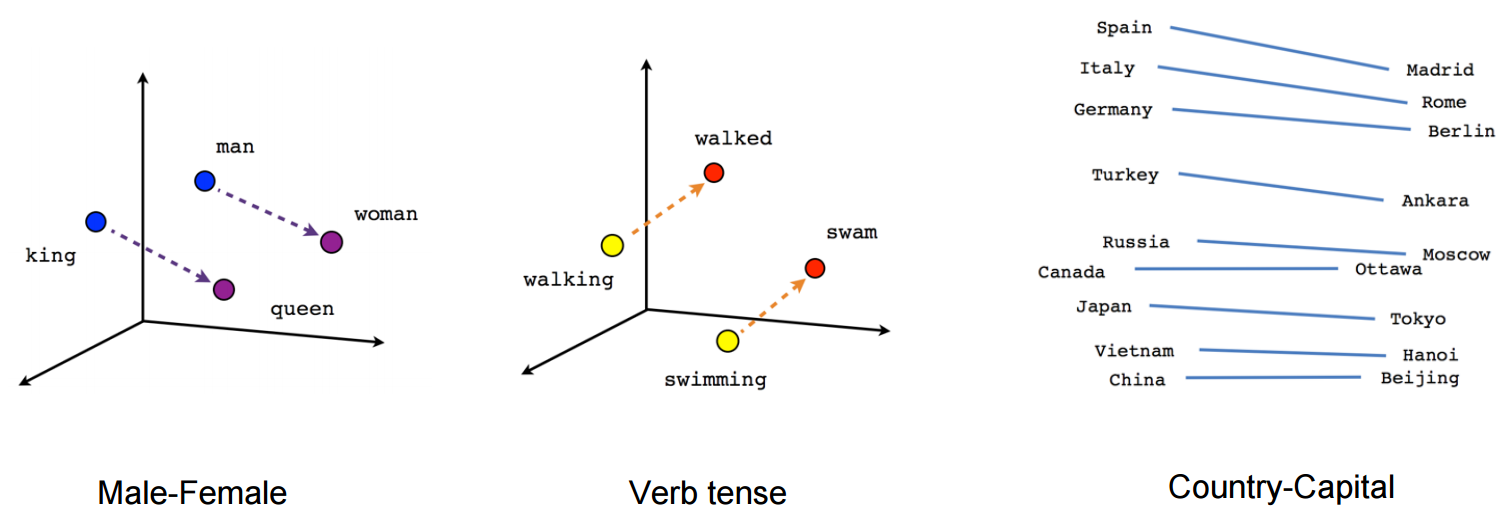

king - man + woman = ?

In [14]:
google_news_model.most_similar(positive=['king','woman'], negative=['man'], topn=1)

[('queen', 0.7118193507194519)]

📌 Постройте следующие аналогии:
- для глагольных форм (swimming - walking + walked)
- для стран и городов (Turkey - Russia + Moscow)

In [15]:
# Место для вашего кода
google_news_model.most_similar(positive=['swimming','walked'], negative=['walking'], topn=1)

[('swam', 0.6925910115242004)]

In [16]:
# Место для вашего кода
google_news_model.most_similar(positive=['Turkey','Moscow'], negative=['Russia'], topn=1)

[('Ankara', 0.8166373372077942)]

### Поиск лишнего слова по смыслу

- вычисляется среднее значение всех слов-векторов (центр);
- вычисляется косинусное расстояние от  центра до каждого слова;
- возвращается единственное слово с наибольшим косинусным расстоянием от центра.

In [17]:
google_news_model.doesnt_match('spoon fork knife plate'.split())

'plate'

In [18]:
google_news_model.doesnt_match('sorrow delight happiness joy'.split())

'sorrow'

## Кластеризация

Кластеризация — это задача разбиения множества объектов на группы, называемые кластерами. Внутри каждой группы должны оказаться «похожие» объекты, а объекты разных группы должны быть как можно более отличны. Главное отличие кластеризации от классификации состоит в том, что перечень групп четко не задан и определяется в процессе работы алгоритма.

Будем осуществлять кластеризацию для текстов новостных статей.


### Загрузка данных

In [19]:
!wget https://raw.githubusercontent.com/Xeanst/NN_in_compling/main/04_word_embeddings/articles_data.csv

--2024-01-24 10:30:23--  https://raw.githubusercontent.com/Xeanst/NN_in_compling/main/04_word_embeddings/articles_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7690867 (7.3M) [text/plain]
Saving to: ‘articles_data.csv’

articles_data.csv   100%[===================>]   7.33M  --.-KB/s    in 0.09s   

2024-01-24 10:30:23 (77.5 MB/s) - ‘articles_data.csv’ saved [7690867/7690867]



In [20]:
import pandas as pd
df_raw = pd.read_csv("articles_data.csv")
df_raw.head()

,Unnamed: 0,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


Интересующие нас колонки: заголовок (title), описание (description) и содержание (content).

Создадим новый датафрейм с одной колонкой "текст", куда добавим объединенное содержимое этих трех колонок.

In [21]:
df = df_raw.copy()

text_columns = ["title", "description", "content"]
for col in text_columns:
    df[col] = df[col].astype(str)

df["text"] = df[text_columns].apply(lambda x: " | ".join(x), axis=1)
df.head(2)

,Unnamed: 0,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count,text
0,0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0,NTSB says Autopilot engaged in 2018 California...
1,1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0,Unemployment falls to post-crash low of 5.2% |...


### Предобработка текста

In [22]:
import re
import string
import nltk
nltk.download("punkt")
from nltk import word_tokenize
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
custom_stopwords = set(stopwords.words("english") + ["news", "new", "top"])

def clean_text(text, tokenizer, stopwords):

    text = text.lower() # приводим к нижнему регистру
    text = re.sub(r"\[(.*?)\]", "", text)  # удаляем слова в квадратных скобках как [+300 chars]
    text = re.sub(r"\s+", " ", text)  # удаляем множественный пробел, табуляцию и перенос строки
    text = re.sub(r"\w+…|…", "", text)  # удаляем многоточие
    text = re.sub(r"(?<=\w)-(?=\w)", " ", text) # заменяем дефис на пробел
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # удаляем пунктуацию

    tokens = tokenizer(text) # токенизируем
    tokens = [t for t in tokens if not t in stopwords]  # удаляем стоп-слова
    tokens = ["" if t.isdigit() else t for t in tokens]  # удаляем числа
    tokens = [t for t in tokens if len(t) > 1]  # удаляем токены длины 1
    return tokens

In [24]:
df["tokens"] = df["text"].map(lambda x: clean_text(x, word_tokenize, custom_stopwords))

# удаляем пустые значения и сохраняем два столбца: тексты и токены
df = df.loc[df.tokens.map(lambda x: len(x) > 0), ["text", "tokens"]]

# удаляем дубликаты строк
_, idx = np.unique(df["tokens"], return_index=True)
df = df.iloc[idx, :]

docs = df["text"].values
tokenized_docs = df["tokens"].values

print(f"Исходные данные: {df_raw.shape}")
print(f"Данные после предобработки: {df.shape}")
df.head()

Исходные данные: (10437, 15)
Данные после предобработки: (9883, 2)


,text,tokens
8155,12th man arrested in statutory rape case at Al...,"[12th, man, arrested, statutory, rape, case, a..."
350,The 18th-Century Paris Apartment That Elegantl...,"[18th, century, paris, apartment, elegantly, b..."
8041,A 19th-Century Home in Brooklyn Gets a 21st-Ce...,"[19th, century, home, brooklyn, gets, 21st, ce..."
4742,1Xtra's DJ Ace needs new kidney | The DJ and p...,"[1xtras, dj, ace, needs, kidney, dj, presenter..."
1071,2nd person in US dies from lung disease linked...,"[2nd, person, us, dies, lung, disease, linked,..."


### Обучение word2vec на данных

Инициализируем модель с помощью модуля [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec). Основные параметры:

- sentences — обучающие данные,
- vector_size — размер вектора (default 100),
- window — размер окна наблюдения (default 5),
- min_count — мин. частотность слова в корпусе (default 5),
- sg — используемый алгоритм обучения (default 0 — CBOW, 1 — Skip-gram),
- workers — количество ядер (default 3),
- alpha — скорость обучения (default 0.025).

In [25]:
from gensim.models import Word2Vec
articles_model = Word2Vec(sentences=tokenized_docs, workers=1, seed=42)
len(articles_model.wv)

11099

In [26]:
articles_model.wv.most_similar(positive=['spain','berlin'], negative=['germany'])

[('toronto', 0.977901816368103),
 ('celebration', 0.9764471650123596),
 ('hosts', 0.9752331376075745),
 ('unofficial', 0.9751620292663574),
 ('closer', 0.9748194813728333),
 ('madrid', 0.9742181301116943),
 ('nervous', 0.974070131778717),
 ('aspect', 0.9739708304405212),
 ('tallest', 0.9729432463645935),
 ('parade', 0.972755491733551)]

In [27]:
articles_model.wv.most_similar('president')

[('trump', 0.9658176898956299),
 ('trumps', 0.9511576294898987),
 ('ivanka', 0.9443051218986511),
 ('pencil', 0.9393517971038818),
 ('impeachment', 0.9378412365913391),
 ('whistleblower', 0.9347614049911499),
 ('inquiry', 0.9284123182296753),
 ('cowboy', 0.9258807897567749),
 ('donald', 0.925025999546051),
 ('complaint', 0.9207698702812195)]

Кластеризация будет осуществляться для документов (новостных статей).

Усредним векторы слов каждого документа, чтобы сгенерировать вектор документа.

- Создаем numpy массив для векторов документов `features`, состоящий из нулей, его размер: количество токенизированных документов х размер вектора в модели
- Проходим по списку токенизированных документов `tokenized_docs`
  
📌 Создаем numpy массив векторов слов `vectors`, состоящий из нулей `np.zeros`, его размер: количество токенов в документе х размер вектора в модели
  - Проходим по токенам документа `tokens`
    - Если вектор для слова `token` присутствует в модели `model`, добавляем вектор слова в массив `vectors`

    📌 Считаем среднее `np.mean` для массива `vectors`, получаем усредненный вектор документа

    - Добавляем полученный вектор в массив `features`

In [28]:
def doc2vec(tokenized_docs, model):

    features = np.zeros((len(tokenized_docs), model.wv.vector_size))
    for i,tokens in enumerate(tokenized_docs):
        vectors = np.zeros((len(tokens), model.wv.vector_size)) # Место для вашего кода
        for j,token in enumerate(tokens):
            if token in model.wv:
                vectors[j] = model.wv[token]
        avg_vec = np.mean(vectors, axis=0) # Место для вашего кода
        features[i] = avg_vec
    return features

In [29]:
vectorized_docs = doc2vec(tokenized_docs, model=articles_model)
vectorized_docs.shape

(9883, 100)

### Метод k-средних

Метод k-средних используется для кластеризации данных на основе алгоритма разбиения векторного пространства на заранее определенное число кластеров $k$. Алгоритм представляет собой итерационную процедуру, в которой выполняются следующие шаги:

1. Выбирается число кластеров $k$.
2. Из исходного множества данных случайным образом выбираются $k$ наблюдений, которые будут служить начальными центрами кластеров.
3. Для каждого наблюдения исходного множества определяется ближайший к нему центр кластера.
4. Вычисляются центроиды — центры тяжести кластеров. Каждый центроид — это вектор, элементы которого представляют собой средние значения соответствующих признаков, вычисленные по всем записям кластера.
5. Центр кластера смещается в его центроид, после чего центроид становится центром нового кластера.
6. 3-й и 4-й шаги итеративно повторяются. На каждой итерации происходит изменение границ кластеров и смещение их центров. В результате минимизируется расстояние между элементами внутри кластеров и увеличиваются междукластерные расстояния.

Остановка алгоритма производится тогда, когда границы кластеров и расположения центроидов не перестанут изменяться от итерации к итерации, т.е. на каждой итерации в каждом кластере будет оставаться один и тот же набор наблюдений.

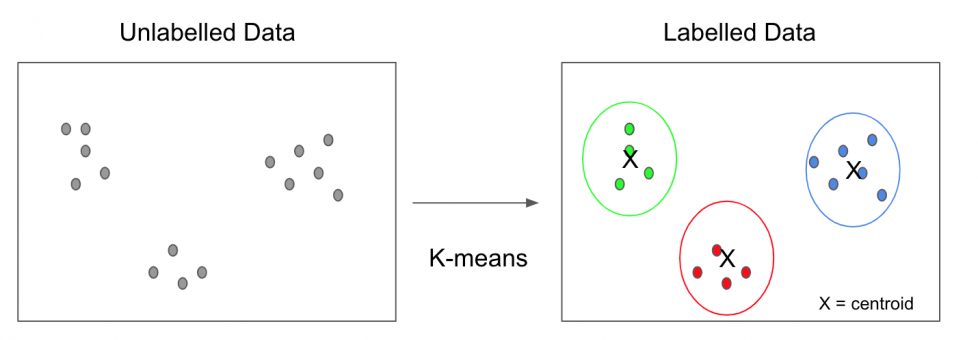

Задача оценки качества кластеризации является более сложной по сравнению с оценкой качества классификации. Нам неизвестны истинные метки объектов, поэтому нужны такие метрики качества, которые можно вычислить по неразмеченной выборке.

Критерий силуэта (англ *Silhouette*) — это метрика, которая не предполагает знания истинных меток объектов, и позволяет оценить качество кластеризации, используя только саму неразмеченную выборку и результат кластеризации.

- точки внутри кластера должны лежать очень близко друг к другу, то есть кластер должен быть *плотным*
- сами кластера должны лежать как можно дальше друг от друга

Метрика силуэта позволяет учитывать оба этих факта и показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров. Меняется в интервале от $-1$ до $1$ (чем выше, тем лучше).

Выберем оптимальное количество кластеров с помощью критерия силуэта. Рассмотрим значения в диапазоне от 2 до 10.

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [31]:
metrics = -1
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, n_init="auto", random_state=21)
    data = kmeans.fit(vectorized_docs)
    silhouette_avg = silhouette_score(vectorized_docs, data.labels_)
    print(f"Для n_clusters = {i} среднее значение силуэта: {silhouette_avg}")
    if silhouette_avg > metrics:
      metrics = silhouette_avg
      result_data = data
      clusters = i

Для n_clusters = 2 среднее значение силуэта: 0.2821904033780783
Для n_clusters = 3 среднее значение силуэта: 0.21428293351910727
Для n_clusters = 4 среднее значение силуэта: 0.3254367190392277
Для n_clusters = 5 среднее значение силуэта: 0.1889461032244668
Для n_clusters = 6 среднее значение силуэта: 0.24036252751734197
Для n_clusters = 7 среднее значение силуэта: 0.18124883108863066
Для n_clusters = 8 среднее значение силуэта: 0.19645358942832689
Для n_clusters = 9 среднее значение силуэта: 0.1848575930232529
Для n_clusters = 10 среднее значение силуэта: 0.17147508423872496


Наибольшее значение силуэта получаем при 4 кластерах.

Рассмотрим значения метрики для каждого кластера отдельно: среднее значение, минимальное и максимальное.

In [32]:
sample_silhouette_values = silhouette_samples(vectorized_docs, data.labels_)
silhouette_values = []
for i in range(clusters):
    cluster_silhouette_values = sample_silhouette_values[data.labels_ == i]
    silhouette_values.append((i, cluster_silhouette_values.shape[0], cluster_silhouette_values.mean(), cluster_silhouette_values.min(), cluster_silhouette_values.max(),))
silhouette_values = sorted(silhouette_values, key=lambda tup: tup[2], reverse=True)
for s in silhouette_values:
    print(f"Кластер {s[0]}: размер: {s[1]}, среднее: {s[2]:.2f}, минимум: {s[3]:.2f}, максимум: {s[4]:.2f}")

Кластер 2: размер: 638, среднее: 0.26, минимум: -0.08, максимум: 0.49
Кластер 3: размер: 2381, среднее: 0.24, минимум: 0.04, максимум: 0.44
Кластер 0: размер: 930, среднее: 0.17, минимум: -0.16, максимум: 0.43
Кластер 1: размер: 1553, среднее: 0.08, минимум: -0.11, максимум: 0.31


Рассмотрим наиболее репрезентативные слова для каждого кластера.

In [33]:
for i in range(clusters):
    tokens_per_cluster = ""
    most_representative = articles_model.wv.most_similar(positive=[kmeans.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Кластер {i}: {tokens_per_cluster}")

Кластер 0: indiana assaulting apartment identified body 
Кластер 1: boeing eased shareholders hire sancho 
Кластер 2: impeaching volodymyr whistleblowers cnnpolitics impeach 
Кластер 3: orleans roger introduced wedding brendan 


In [34]:
test_cluster = 2
most_representative_docs = np.argsort(
    np.linalg.norm(vectorized_docs - kmeans.cluster_centers_[test_cluster], axis=1)
)
for d in most_representative_docs[:3]:
    print(docs[d])
    print("-------------")

Trump says gun control negotiations are "going very slowly" | In an interview with Fox News, Trump said his administration is "not moving on anything" with regards to gun control | President Trump contradicted reports that the White House is moving forward with a legislative package on gun control, saying in an interview with Fox News anchor Ed Henry Thursday that negotiations on the issue are "going very slowly."
"No, we're not moving… [+2396 chars]
-------------
Women entrepreneurs play 'critical role' in Colombia's economy, peace: Ivanka Trump | Women entrepreneurs are playing a "critical role" in Colombia's economic development and its transition to peace, White House adviser Ivanka Trump said on Tuesday during a visit to Bogota. | BOGOTA (Reuters) - Women entrepreneurs are playing a “critical role” in Colombia’s economic development and its transition to peace, White House adviser Ivanka Trump said on Tuesday during a visit to Bogota. 
The daughter of U.S. President Donald Trump w

## Классификация

Повторим реализацию анализа тональности с помощью многослойного персептрона. Вместо того, чтобы обучать слой `nn.Embeddings`, обучим эмбеддинги заранее с помощью word2vec.

### Загрузка данных

In [35]:
!wget https://raw.githubusercontent.com/Xeanst/NN_in_compling/main/03_torch_mlp/positive.csv
!wget https://raw.githubusercontent.com/Xeanst/NN_in_compling/main/03_torch_mlp/negative.csv

--2024-01-24 10:48:01--  https://raw.githubusercontent.com/Xeanst/NN_in_compling/main/03_torch_mlp/positive.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23811619 (23M) [text/plain]
Saving to: ‘positive.csv’

positive.csv        100%[===================>]  22.71M   141MB/s    in 0.2s    

2024-01-24 10:48:02 (141 MB/s) - ‘positive.csv’ saved [23811619/23811619]

--2024-01-24 10:48:02--  https://raw.githubusercontent.com/Xeanst/NN_in_compling/main/03_torch_mlp/negative.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24450

In [36]:
import pandas as pd
positive = pd.read_csv('positive.csv', encoding='utf-8', sep=';', header=None,  names=[0,1,2,'text','tone',5,6,7,8,9,10,11])
negative = pd.read_csv('negative.csv', encoding='utf-8', sep=';', header=None, names=[0,1,2,'text','tone',5,6,7,8,9,10,11] )
negative['tone'] = 0
all_data = pd.concat([positive[['text','tone']], negative[['text','tone']]], ignore_index=True)
print(len(all_data))
all_data.head()

216130


,text,tone
0,RT @SuetinaqweHh: Моя Дубовскаая приехалааа:**...,1
1,"Наконец-то на улице снег^) Немного, но всё же ...",1
2,какие вы противные!)) пишите тyт вечно про Бар...,1
3,"RT @kejajanekys: у моего бывшего,с которым был...",1
4,до аэробики я и не подозревала о наличии у себ...,1


In [37]:
from sklearn.model_selection import train_test_split
train_sentences, val_sentences = train_test_split(all_data, test_size=0.1, random_state=42)

### Предобработка данных

Убираем пунктуацию, приводим к нижнему регистру и токенизируем

In [38]:
from string import punctuation
def text_preprocessing(text):
    tokens = [token.strip(punctuation).lower() for token in text.split()]
    return tokens

Создаем словарь уникальных токенов и фильтрованный словарь токенов, встретившихся больше 10 раз.

In [39]:
from collections import Counter
vocabulary = Counter()
for text in all_data['text']:
    vocabulary.update(text_preprocessing(text))
print('Всего уникальных токенов:', len(vocabulary))
filtered_vocabulary = set()
for word in vocabulary:
  if vocabulary[word] > 10:
    filtered_vocabulary.add(word)
print('Уникальных токенов, вcтретившихся больше 10 раз:', len(filtered_vocabulary))

Всего уникальных токенов: 351664
Уникальных токенов, вcтретившихся больше 10 раз: 16164


Создаем словарь для перевода слов в индексы.

In [40]:
word2id = {'PAD':0}
for word in filtered_vocabulary:
    word2id[word] = len(word2id)
print(word2id)

{'PAD': 0, '': 1, 'маман': 2, 'родить': 3, 'увидит': 4, 'обнять': 5, 'исключение': 6, 'отправляла': 7, 'смешную': 8, 'пикап': 9, 'скажем': 10, 'успел': 11, 'занимались': 12, 'alenapolitik': 13, 'физике': 14, 'тараканов': 15, 'уезжает': 16, 'кому-то': 17, 'меняются': 18, 'детском': 19, 'улыбайся': 20, 'дяде': 21, 'объяснили': 22, 'виновата': 23, 'силу': 24, 'оплатил': 25, 'сдаем': 26, 'ввиду': 27, 'мерзко': 28, 'кхл': 29, 'появятся': 30, 'страх': 31, 'поиграла': 32, 'заботу': 33, 'аж': 34, 'достану': 35, 'работаешь': 36, 'задаешь': 37, 'назвала': 38, 'сердцах': 39, 'наступил': 40, 'жанр': 41, 'do': 42, 'проверить': 43, 'руб': 44, '41': 45, 'алгебре': 46, 'неправильно': 47, 'ме': 48, 'orange__anya': 49, 'ста': 50, 'mamo_oru': 51, 'говорил': 52, 'тема': 53, 'бодрячком': 54, 'встречала': 55, 'трезвая': 56, 'хах': 57, 'древний': 58, 'смерти': 59, 'считаете': 60, 'воздух': 61, 'простудилась': 62, 'побывала': 63, 'скучно': 64, 'ў': 65, 'закрыть': 66, 'курса': 67, 'мстить': 68, 'желания': 69, 

### Dataset, Sampler, DataLoader

Создаем класс для датасета.

In [41]:
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from torch.nn.utils.rnn import pad_sequence

In [42]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
DEVICE

device(type='cpu')

In [43]:
class ToneDataset(Dataset):

    def __init__(self, dataset, word2id, DEVICE):
        self.dataset = dataset['text'].values
        self.word2id = word2id
        self.length = dataset.shape[0]
        self.target = dataset['tone'].values
        self.device = DEVICE

    def __len__(self):
        return self.length

    def __getitem__(self, index):
        tokens = self.text_preprocessing(self.dataset[index])
        ids = torch.LongTensor([self.word2id[token] for token in tokens if token in self.word2id])
        y = [self.target[index]]
        return ids, y

    def text_preprocessing(self, text):
        tokens = [token.strip(punctuation).lower() for token in text.split()]
        return tokens

    def collate_fn(self, batch):
        ids, y = list(zip(*batch))
        padded_ids = pad_sequence(ids, batch_first=True).to(self.device)
        y = torch.Tensor(y).to(self.device)
        return padded_ids, y

Определяем Dataset, Sampler и DataLoader.

In [44]:
train_dataset = ToneDataset(train_sentences, word2id, DEVICE)
val_dataset = ToneDataset(val_sentences, word2id, DEVICE)
train_sampler = RandomSampler(train_dataset)
val_sampler = SequentialSampler(val_dataset)
train_iterator = DataLoader(train_dataset, collate_fn = train_dataset.collate_fn, sampler=train_sampler, batch_size=1024)
val_iterator = DataLoader(val_dataset, collate_fn = val_dataset.collate_fn, sampler=val_sampler, batch_size=1024)

### Векторизация

Применим предобработку ко всем текстам.

In [45]:
texts = all_data.text.apply(text_preprocessing).tolist()

Обучим модель word2vec на наших данных и протестируем её.

In [46]:
tone_model = Word2Vec(texts, min_count=1, workers=1, seed=42)
len(tone_model.wv)

351664

In [47]:
tone_model.wv.most_similar('веселый')

[('прекрасный', 0.9727190732955933),
 ('шикарный', 0.9673424959182739),
 ('офигенный', 0.9579569697380066),
 ('замечательный', 0.9542246460914612),
 ('интересный', 0.9479166865348816),
 ('тупой', 0.9465552568435669),
 ('незаметный', 0.9404380917549133),
 ('отличный', 0.9395445585250854),
 ('потрясающий', 0.9354472756385803),
 ('бешеный', 0.9344919323921204)]

In [48]:
tone_model.wv.doesnt_match("грусть печаль радость беда".split())

'радость'

Сопоставим полученные веса словам из словаря `word2id`.

📌 Создадим numpy массив `weights` из нулей `np.zeros`, его размер: размер словаря `word2id` х размер эмбеддингов.

- Проходим по ключам (словам) и значениям (индексам) в словаре
- Паддинг пропускаем (его индекс 0)

📌 Если слово есть в модели, записываем вектор слова `word` из модели `tone_model`.

- Cловам, которых нет в словаре, сопоставляем случайный вектор.

In [49]:
weights = np.zeros((len(word2id), tone_model.wv.vector_size)) # Место для вашего кода
count = 0
for word, id in word2id.items():
    if word == 'PAD':
        continue
    try:
        weights[id] = tone_model.wv[word] # Место для вашего кода
    except KeyError:
      count += 1
      weights[id] = np.random.normal(0,0.1,100)

### Создание и обучение модели

In [50]:
import torch.nn as nn
import torch.optim as optim

In [51]:
class MLP_w2v(nn.Module):

    def __init__(self, vocab_size):

        super().__init__()
        # указываем в атрибутах класса, какие слои и активации нам понадобятся
        self.embedding = nn.Embedding(vocab_size, 100)
        self.embedding.from_pretrained(torch.tensor(weights), freeze=True)
        self.emb2h = nn.Linear(100, 10)
        self.act1 = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.h2out = nn.Linear(10, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, text): # указываем, как связываются слои и активации между собой

        embedded = self.embedding(text)   # переводим последовательность индексов в последовательность векторов
        mean_emb = torch.mean(embedded, dim=1) # считаем средний вектор предложения
        hidden = self.emb2h(mean_emb) # пропускаем вектор через полносвязный слой
        hidden = self.dropout(hidden)
        hidden = self.act1(hidden)
        hidden = self.dropout(hidden)
        out = self.h2out(hidden) # возвращаем одно число для каждого текста
        proba = self.act2(out) # пропускаем число через сигмоиду, получая вероятность класса

        return proba

In [52]:
def train(model, iterator, optimizer, criterion):
    print('Training...')
    epoch_loss = 0 # задаем значение функции потерь для подсчета средней ошибки на всех батчах
    model.train() # переводим модель в состояние обучения: явно указываем, что сейчас надо будет хранить градиенты у всех весов

    for i, (texts, ys) in enumerate(iterator): # проходим по каждому батчу
        optimizer.zero_grad() # обнуляем градиенты
        preds_proba = model(texts) # применяем модель к данным и получаем вероятности классов
        loss = criterion(preds_proba, ys) # считаем значение функции потерь
        loss.backward() # считаем градиенты по всем параметрам модели
        optimizer.step() # обновляем веса с помощью шага оптимизатора
        epoch_loss += loss.item() # сохраняем значение функции потерь

        if not (i + 1) % 20: # выводим значение функции потерь для каждого 20-го батча
            print(f'Train loss: {epoch_loss/i}')

    return epoch_loss / len(iterator) # возвращаем среднее значение функции потерь по обучающей выборке

In [53]:
def validate(model, iterator, criterion):
    print("\nValidating...")
    epoch_loss = 0
    model.eval() # переводим модель в состояние оценки
    with torch.no_grad(): # не считаем градиенты
        for i, (texts, ys) in enumerate(iterator):
            predictions = model(texts) # делаем предсказания для текстов
            loss = criterion(predictions, ys) # считаем значения функции потерь на батче
            epoch_loss += loss.item()
            if not (i + 1) % 5: # выводим значение функции потерь для каждого 5-го батча
              print(f'Val loss: {epoch_loss/i}')

    return epoch_loss / len(iterator) # возвращаем среднее значение функции потерь по валидационной выборке

In [54]:
model = MLP_w2v(len(word2id))
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss() # Binary Cross Entropy

# веса модели и значения функции потерь храним там же, где и все остальные тензоры
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

In [55]:
losses = []
losses_eval = []

for i in range(20):
    print(f'\nstarting Epoch {i}')
    epoch_loss = train(model, train_iterator, optimizer, criterion)
    losses.append(epoch_loss)

    epoch_loss_on_test = validate(model, val_iterator, criterion)
    losses_eval.append(epoch_loss_on_test)


starting Epoch 0
Training...
Train loss: 0.7296732820962605
Train loss: 0.7111015442090157
Train loss: 0.7046125753451202
Train loss: 0.701230538796775
Train loss: 0.6991109119521247
Train loss: 0.697630357341606
Train loss: 0.6965214931707588
Train loss: 0.6955096028136007
Train loss: 0.6946271548058067

Validating...
Val loss: 0.8547932952642441
Val loss: 0.7597677840126885
Val loss: 0.7318229164396014
Val loss: 0.7186189419344852

starting Epoch 1
Training...
Train loss: 0.7204423484049345
Train loss: 0.7006511275584881
Train loss: 0.6929551777193101
Train loss: 0.68856729736811
Train loss: 0.6844050462799843
Train loss: 0.6815868901605365
Train loss: 0.6785318474117801
Train loss: 0.6758864139610866
Train loss: 0.6734274672396356

Validating...
Val loss: 0.794406846165657
Val loss: 0.7078829871283637
Val loss: 0.6797099241188594
Val loss: 0.6678819342663413

starting Epoch 2
Training...
Train loss: 0.6803141675497356
Train loss: 0.6601501198915335
Train loss: 0.6523438298096091
Tr

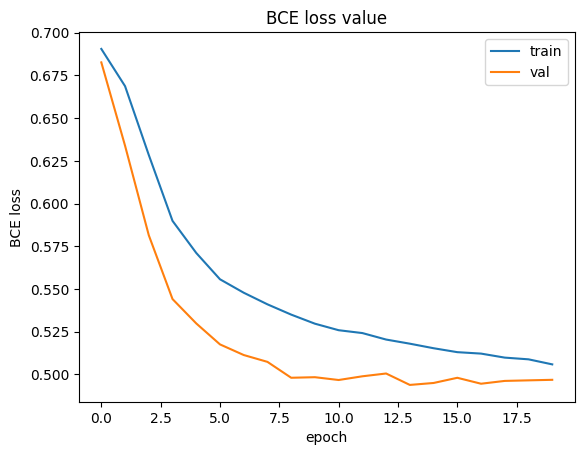

In [56]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.plot(losses_eval)
plt.title('BCE loss value')
plt.ylabel('BCE loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()